In [71]:
import  warnings
warnings.simplefilter('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

%matplotlib inline

In [2]:
test = pd.read_csv('test_table.csv')
user = pd.read_csv('user_table.csv')

In [23]:
test.head()

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1


In [4]:
user.head()

,user_id,sex,age,country
0,765821,M,20,Mexico
1,343561,F,27,Nicaragua
2,118744,M,23,Colombia
3,987753,F,27,Venezuela
4,554597,F,20,Spain


In [53]:
test.isnull().sum()

user_id                  0
date                     0
source                   0
device                   0
browser_language         0
ads_channel         271444
browser                  0
conversion               0
test                     0
dtype: int64

In [54]:
user.isnull().sum()

user_id    0
sex        0
age        0
country    0
dtype: int64

# Confirm Control group's Conversion Rate is better than Test group's

In [74]:
test_user = pd.merge(test, user, on = 'user_id')
test_user

,user_id,date,source,device,browser_language,ads_channel,browser,conversion,test,sex,age,country
0,315281,2015-12-03,Direct,Web,ES,NaN,IE,1,0,M,32,Spain
1,497851,2015-12-04,Ads,Web,ES,Google,IE,0,1,M,21,Mexico
2,848402,2015-12-04,Ads,Web,ES,Facebook,Chrome,0,0,M,34,Spain
3,290051,2015-12-03,Ads,Mobile,Other,Facebook,Android_App,0,1,F,22,Mexico
4,548435,2015-11-30,Ads,Web,ES,Google,FireFox,0,1,M,19,Mexico
...,...,...,...,...,...,...,...,...,...,...,...,...
452862,425010,2015-12-04,SEO,Web,ES,NaN,FireFox,0,0,M,50,Mexico
452863,826793,2015-12-01,SEO,Mobile,ES,NaN,Android_App,0,1,F,20,Colombia
452864,514870,2015-12-02,Ads,Mobile,ES,Bing,Android_App,0,0,M,25,Spain
452865,785224,2015-12-04,SEO,Mobile,ES,NaN,Android_App,0,1,M,21,Colombia


In [81]:
control = test_user[test_user['test'] == 0]
test = test_user[test_user['test'] == 1]

In [94]:
# Check in Control, the Spanish user has higher conversion rate
groupby_country = control[['conversion', 'country']].groupby('country')['conversion'].mean()
groupby_country = groupby_country.reset_index().sort_values('conversion', ascending = False)

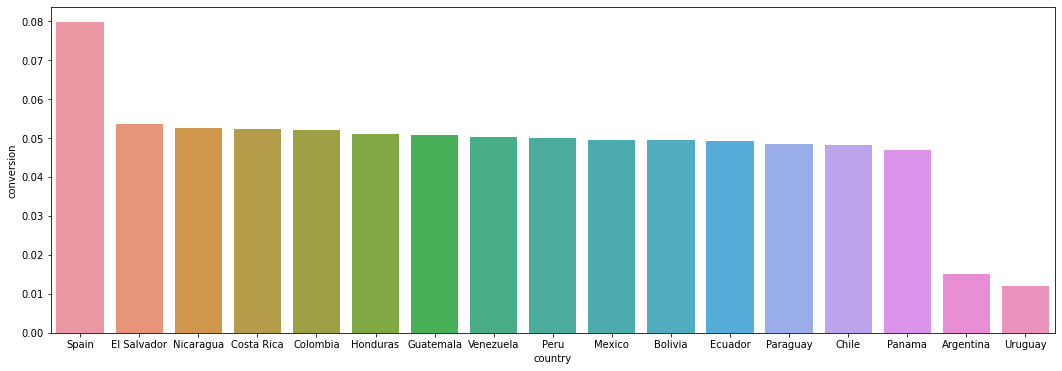

In [95]:
fig, ax = plt.subplots(figsize=(18, 6))
sns.barplot(x='country', y='conversion', data=groupby_country, ax=ax)
plt.show()

In [98]:
control = control[control['country'] != 'Spain']
test = test[test['country'] != 'Spain']

In [101]:
control['conversion'].mean() * 100

4.829179055749524

In [102]:
test['conversion'].mean() * 100

4.341116167842279

# Investigation

In [107]:
countries = [name for name in test_user['country'].unique() if name is not np.nan]
countries

['Spain',
 'Mexico',
 'Venezuela',
 'Bolivia',
 'Colombia',
 'Uruguay',
 'El Salvador',
 'Nicaragua',
 'Peru',
 'Costa Rica',
 'Chile',
 'Argentina',
 'Ecuador',
 'Guatemala',
 'Honduras',
 'Paraguay',
 'Panama']

In [110]:
for country in countries:
    test_val = test_user[(test_user['country'] == country) & (test_user['test'] == 1)]['conversion'].values
    cont_val = test_user[(test_user['country'] == country) & (test_user['test'] == 0)]['conversion'].values
    
    test_mean = test_val.mean()
    cont_mean = cont_val.mean()
    p_val = ttest_ind(test_val, cont_val, equal_var=False).pvalue
    print(country + ': ' + str(p_val))

Spain: nan
Mexico: 0.16554372211039645
Venezuela: 0.5737015234387255
Bolivia: 0.7188852468451075
Colombia: 0.4237190741314114
Uruguay: 0.8797639736514224
El Salvador: 0.2481266743266678
Nicaragua: 0.7804003858904794
Peru: 0.7719529885153548
Costa Rica: 0.6878763537073986
Chile: 0.30284764308444695
Argentina: 0.3351465468746866
Ecuador: 0.9615116906006622
Guatemala: 0.5721072081912069
Honduras: 0.4714628565257586
Paraguay: 0.8836965034962364
Panama: 0.7053268372725889


Null hypothesis: the control and test group has identical conversion rate: d = control - test = 0
Hypothesis: the control and test group has different conversion rate: d = control - test != 0

All countries has P-value largr than 0.05, so we could not reject the Null hypothesis, which means our A/B test is not significant